In [1]:
import numpy as np
import scipy as sp
import constants as c
import matplotlib.pyplot as plt
import matplotlib.colors as colors
from simu import Simu

In [2]:
r_min = 2.0*c.AU
r_max = 8.0*c.AU
r_N = 1000

r_grid = np.linspace(r_min,r_max,r_N)
z = 0.0*c.AU

In [3]:
a = 1.0e-0
alpha = 1.0e-3

q = -1./2
ps = -3./4.
p = ps-0.5*(3.+q)

T0 = 280.
sigma0 = 2000.
c0 = np.sqrt(c.kB*T0/c.mg)
h0 = np.sqrt(c.kB*T0*c.AU**3./(c.G*c.Mstar*c.mg))

hg = h0*(r_grid/c.AU)**((q+3.)/2.)
T = T0*(r_grid/c.AU)**q
c_s = np.sqrt(c.kB*T/c.mg)
OmegaK_mid = np.sqrt(c.G*c.Mstar/r_grid**3.)
OmegaK =  OmegaK_mid*(1.+(z/r_grid)**2.)**(-3./4.)

rho_0 = sigma0/(np.sqrt(2.*np.pi)*h0)
rho_g = rho_0*(r_grid/c.AU)**p*np.exp(-z**2/(2.*hg**2.))

rho_s = 1.4

ts = np.sqrt(np.pi/8)*(rho_s*a)/(rho_g*c_s)
St = OmegaK_mid*ts
D_g = alpha*hg*c_s
D_d = D_g/(1.+St**2.)

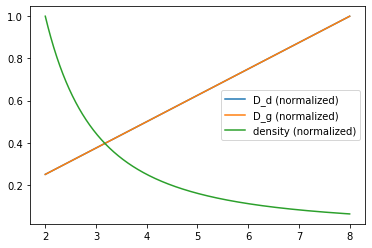

In [4]:
plt.figure()
plt.plot(r_grid/c.AU,D_d/max(D_d),label='D_d (normalized)')
plt.plot(r_grid/c.AU,D_d/max(D_d),label='D_g (normalized)')
plt.plot(r_grid/c.AU,rho_g/max(rho_g),label='density (normalized)')
plt.legend()
plt.show()

In [5]:
dD_d_dr = D_d/r_grid*(q+3./2.+2.*St**2./(1.+St**2)*(3./2.+p+q/2.+0.5*(q+3.)*(z/hg)**2))

drhog_dr = rho_g*p/r_grid

In [6]:
P_g =  rho_g*c_s**2
dP_dr = P_g/r_grid*(p+q+(0.5*(q+3)*(z**2/(hg**2))))
A = r_grid*OmegaK**2.
B = dP_dr/rho_g

eta = -B/A

In [7]:
x_grid = r_grid
y_grid = 0.0

v_FP_x = dD_d_dr*x_grid/r_grid


v_gas_x = D_d/rho_g*drhog_dr*x_grid/r_grid

v_r = -St*eta*r_grid*OmegaK_mid 

v_eff = v_r+v_gas_x+v_FP_x

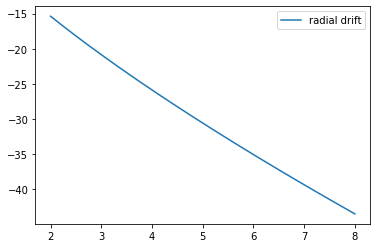

In [8]:
plt.figure()
#plt.plot(r_grid/c.AU,v_FP_x,label='diffusivity variation')
#plt.plot(r_grid/c.AU,v_gas_x,label='density variation')
plt.plot(r_grid/c.AU,v_r,label='radial drift')
#plt.plot(r_grid/c.AU,v_eff,label='v_eff')
plt.legend()
plt.yscale('linear')
plt.show()